In [1]:
from IPython.display import display, Math, HTML
import pandas as pd
# import pandas_td as td
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


pd.set_option("display.max_columns", 100)

In [2]:
END_OBS_DATE = pd.to_datetime('2013-10-01')

## Prepare dataset

In [3]:
from lifelines.datasets import load_canadian_senators

df = load_canadian_senators()
df.drop(['diff_days','observed'], axis=1, inplace=True)

df['end_date'] = pd.to_datetime(df['end_date'])
df.loc[df['end_date'] > END_OBS_DATE, 'end_date'] = None

df.head()

,Name,Political Affiliation at Appointment,Province / Territory,Appointed on the advice of,Term (yyyy.mm.dd),start_date,end_date,reason
0,"Abbott, John Joseph Caldwell",Liberal-Conservative,Quebec,"Macdonald, John Alexander",1887.05.12 - 1893.10.30 (Death),1887-05-12 00:00:00,1893-10-30,Death
1,"Adams, Michael",Conservative (1867-1942),New Brunswick,"Bowell, Mackenzie",1896.01.07 - 1899.01.01 (Death),1896-01-07 00:00:00,1899-01-01,Death
2,"Adams, Willie",Liberal Party of Canada,Northwest Territories,"Trudeau, Pierre Elliott",1977.04.05 - 2009.06.22 (Retirement),1977-04-05 00:00:00,2009-06-22,Retirement
3,"Aikins, James Cox",Liberal-Conservative,Ontario,Royal Proclamation,1867.10.23 - 1882.05.30 (Resignation),1867-10-23 00:00:00,1882-05-30,Resignation
4,"Aikins, James Cox",Liberal-Conservative,Ontario,"Bowell, Mackenzie",1896.01.07 - 1904.08.06 (Death),1896-01-07 00:00:00,1904-08-06,Death


**Calculate the duration (in days and in years) and observed (`True` if the event has occurred)**

In [17]:
from lifelines.utils import datetimes_to_durations

#TO-DO
duration_in_days, observed = datetimes_to_durations(
    df['start_date'],
    df['end_date'],
    freq='D',
    fill_date=END_OBS_DATE
)

duration_in_years, observed = datetimes_to_durations(
    df['start_date'],
    df['end_date'],
    freq='Y',
    fill_date=END_OBS_DATE
)

df['duration_in_days'] = duration_in_days
df['duration_in_years'] = duration_in_years
df['observed'] = observed

**Calculate the number of censored and uncensored data**

In [22]:
df.iloc[0]

Name                                        Abbott, John Joseph Caldwell
Political Affiliation at Appointment                Liberal-Conservative
Province / Territory                                              Quebec
Appointed on the advice of                     Macdonald, John Alexander
Term (yyyy.mm.dd)                       1887.05.12 - 1893.10.30  (Death)
start_date                                           1887-05-12 00:00:00
end_date                                             1893-10-30 00:00:00
reason                                                             Death
duration_day                                                        2363
observed                                                            True
duration_in_days                                                    2363
duration_in_years                                                      6
Name: 0, dtype: object

In [27]:
# TO-DO
n_censored = df[(df['observed'] == False)].shape[0]
n_uncensored = df[(df['observed'] == True)].shape[0]

print('# of censored data   : {:3,.0f}'.format(n_censored))
print('# of uncensored data : {:3,.0f}'.format(n_uncensored))

# of censored data   :  99
# of uncensored data : 834


## Plot Survival Function

In [28]:
from lifelines.datasets import load_dd

df = load_dd()
df.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


**Take 50 random samples from the data, plot the lifetime of each subject**

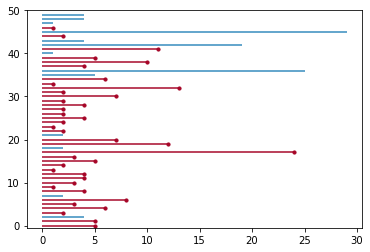

In [39]:
from lifelines.plotting import plot_lifetimes

sample = df.sample(n=50, random_state=50).reset_index(drop=True)

plot_lifetimes(
    sample['duration'],
    sample['observed'],
    sort_by_duration=True
);

**Plot Kaplan-Meier Curve**

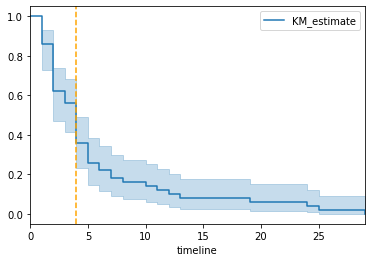

In [40]:
from lifelines import KaplanMeierFitter

# TODO: fit KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(sample['duration'])
# TODO: plot curve
kmf.plot();
# TODO: show the median
plt.axvline(
    kmf.median_,
    linestyle='--',
    color='orange'
)

plt.legend();

**Plot survival function and its confidence interval**

The survival function and the confidence interval are computational estimated. The confidence interval is estimated using Greenwood confidence interval.

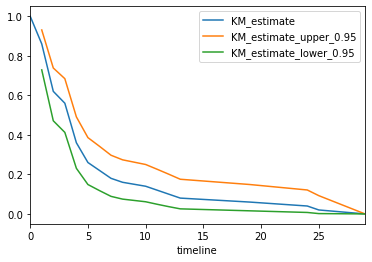

In [49]:
ax = plt.subplot(111)

# TODO: plot survival function
kmf.survival_function_.plot(ax=ax);

# TODO: plot confidence interval
kmf.confidence_interval_survival_function_.plot(ax=ax);

**Compare different group: Democracy**

Median: 6.0
Median: 3.0


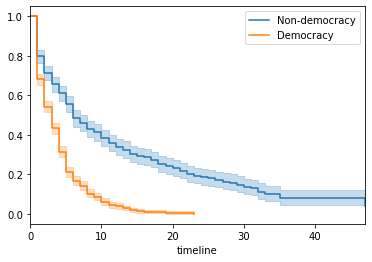

In [56]:
#TODO
ax = plt.subplot(111)

for group in df['democracy'].unique():
    mask = (df['democracy'] == group)
    kmf = KaplanMeierFitter()
    kmf.fit(
        df[mask]['duration'],
        df[mask]['observed']
    )
    kmf.plot(
        label=group,
        ax=ax
    )
    print("Median: {}".format(kmf.median_))
    
plt.show();

**Show the median of each group**

In [ ]:
#TODO

**Perform statistical test to check whether the two groups different**

In [61]:
from lifelines.statistics import multivariate_logrank_test

#TOOD
results = multivariate_logrank_test(
    df['duration'],
    df['democracy'],
    df['observed']
)

results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
         260.47 <0.005    192.23


**Compare different group: Regime and perform statistical test**

In [63]:
#TODO
from lifelines.statistics import multivariate_logrank_test

#TOOD
results = multivariate_logrank_test(
    df['duration'],
    df['regime'],
    df['observed']
)

results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 5

---
 test_statistic      p  -log2(p)
         322.60 <0.005    222.10


## Plot Hazard Function

**Plot cumulative hazard function**

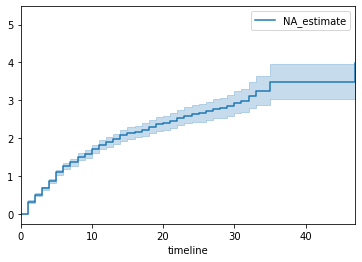

In [66]:
from lifelines import NelsonAalenFitter

#TODO
naf = NelsonAalenFitter()
naf.fit(df['duration'], df['observed'])

naf.plot();

**Plot hazard function with different bandwidth**

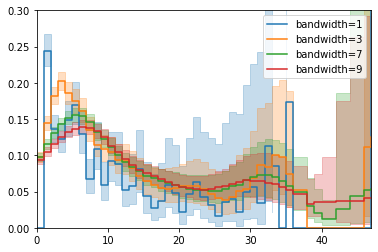

In [68]:
ax = plt.subplot()
naf.plot_hazard(bandwidth=1, ax=ax, label='bandwidth=1')
naf.plot_hazard(bandwidth=3, ax=ax, label='bandwidth=3')
naf.plot_hazard(bandwidth=7, ax=ax, label='bandwidth=7')
naf.plot_hazard(bandwidth=9, ax=ax, label='bandwidth=9')

plt.ylim(0,.3);

## Parametric Hazard Function

<lifelines.WeibullFitter: fitted with 1808 observations, 340 censored>
number of subjects = 1808
  number of events = 1468
    log-likelihood = -4144.28
        hypothesis = lambda_ != 1, rho_ != 1

---
         coef  se(coef)  lower 0.95  upper 0.95      p  -log2(p)
lambda_  6.11      0.17        5.77        6.45 <0.005    642.95
rho_     0.94      0.02        0.91        0.98 <0.005      9.45


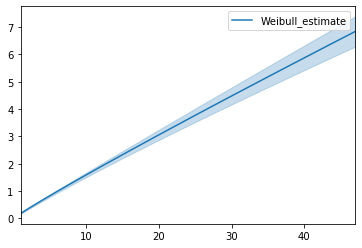

In [69]:
from lifelines import WeibullFitter

wf = WeibullFitter()

wf.fit(
    df['duration'],
    df['observed']
)

wf.print_summary()
wf.plot();

## Survival Regression

In [70]:
from lifelines.datasets import load_rossi

rossi = load_rossi()
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


**Fit survival function**

In [73]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(
    rossi,
    'week',
    'arrest'
)

cph.print_summary();

<lifelines.CoxPHFitter: fitted with 432 observations, 318 censored>
      duration col = 'week'
         event col = 'arrest'
number of subjects = 432
  number of events = 114
partial log-likelihood = -658.75
  time fit was run = 2019-12-04 10:05:50 UTC

---
      coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
fin  -0.38      0.68      0.19           -0.75           -0.00                0.47                1.00
age  -0.06      0.94      0.02           -0.10           -0.01                0.90                0.99
race  0.31      1.37      0.31           -0.29            0.92                0.75                2.50
wexp -0.15      0.86      0.21           -0.57            0.27                0.57                1.30
mar  -0.43      0.65      0.38           -1.18            0.31                0.31                1.37
paro -0.08      0.92      0.20           -0.47            0.30                0.63                1.35
prio  0.09      1.10

**Plot baseline hazard**

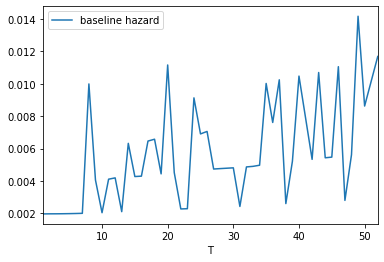

In [74]:
#TODO
cph.baseline_hazard_.plot();

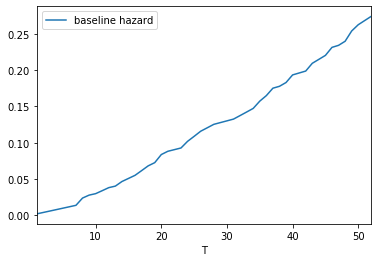

In [75]:
cph.baseline_cumulative_hazard_.plot();

**Use cross validation**

In [81]:
from lifelines.utils import k_fold_cross_validation

scores = k_fold_cross_validation(cph, rossi, 'week', event_col='arrest',k=3)

print("Mean: {} ".format(np.mean(scores)))

Mean: 0.6003743394874439 


**Check assumption**

In [86]:
#TODO: fit model
cph = CoxPHFitter()
cph.fit(rossi, 'week','arrest')

#TODO: check assumption
cph.check_assumptions(rossi)

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.

<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
 null_distribution = chi squared
degrees_of_freedom = 1

---
           test_statistic      p  -log2(p)
age  km             11.03 <0.005     10.12
     rank           11.09 <0.005     10.17
fin  km              0.02   0.89      0.17
     rank            0.02   0.90      0.16
mar  km              0.60   0.44      1.19
    

### Stratification

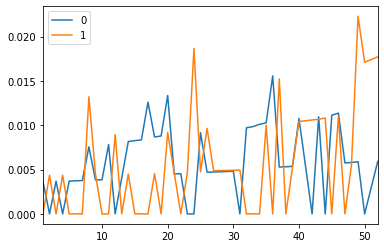

In [87]:
#plot baseline hazard
cph = CoxPHFitter()
cph.fit(rossi, 'week','arrest',strata=['wexp'])

cph.baseline_hazard_.plot();

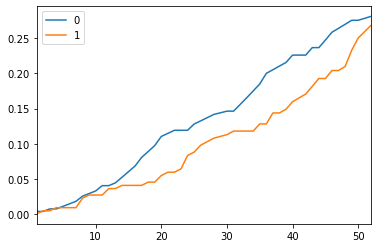

In [93]:
cph.baseline_cumulative_hazard_.plot();

In [88]:
#print summary
cph.print_summary();

## although we split the model based on its subgroup, we have one coefficient for wexp

<lifelines.CoxPHFitter: fitted with 432 observations, 318 censored>
      duration col = 'week'
         event col = 'arrest'
            strata = ['wexp']
number of subjects = 432
  number of events = 114
partial log-likelihood = -580.89
  time fit was run = 2019-12-04 10:08:57 UTC

---
      coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
fin  -0.38      0.68      0.19           -0.76           -0.01                0.47                0.99
age  -0.06      0.94      0.02           -0.10           -0.01                0.90                0.99
race  0.31      1.36      0.31           -0.30            0.91                0.74                2.49
mar  -0.45      0.64      0.38           -1.20            0.29                0.30                1.34
paro -0.08      0.92      0.20           -0.47            0.30                0.63                1.35
prio  0.09      1.09      0.03            0.03            0.15                1.04           

## Modify the functional form

In [89]:
rossi['age**2'] = rossi['age']**2

cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest', strata=['wexp'])

cph.check_assumptions(rossi);

Proportional hazard assumption looks okay.


In [90]:
cph.print_summary();

<lifelines.CoxPHFitter: fitted with 432 observations, 318 censored>
      duration col = 'week'
         event col = 'arrest'
            strata = ['wexp']
number of subjects = 432
  number of events = 114
partial log-likelihood = -579.77
  time fit was run = 2019-12-04 10:10:37 UTC

---
        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
fin    -0.38      0.68      0.19           -0.76           -0.01                0.47                0.99
age    -0.27      0.76      0.14           -0.54            0.00                0.58                1.00
race    0.34      1.40      0.31           -0.27            0.94                0.76                2.56
mar    -0.40      0.67      0.38           -1.15            0.36                0.32                1.43
paro   -0.09      0.91      0.20           -0.48            0.29                0.62                1.34
prio    0.09      1.10      0.03            0.04            0.15                1